In [1]:
!pip install librosa

     -------------------------------------- 253.7/253.7 kB 2.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 8.0 MB/s eta 0:00:00
     ------------------------------------- 184.6/184.6 kB 10.9 MB/s eta 0:00:00


In [1]:
#https://huggingface.co/learn/audio-course/chapter1/audio_data
import librosa
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

C:\Users\1508\AppData\Local\anaconda30\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [8]:
sampling_rate

22050

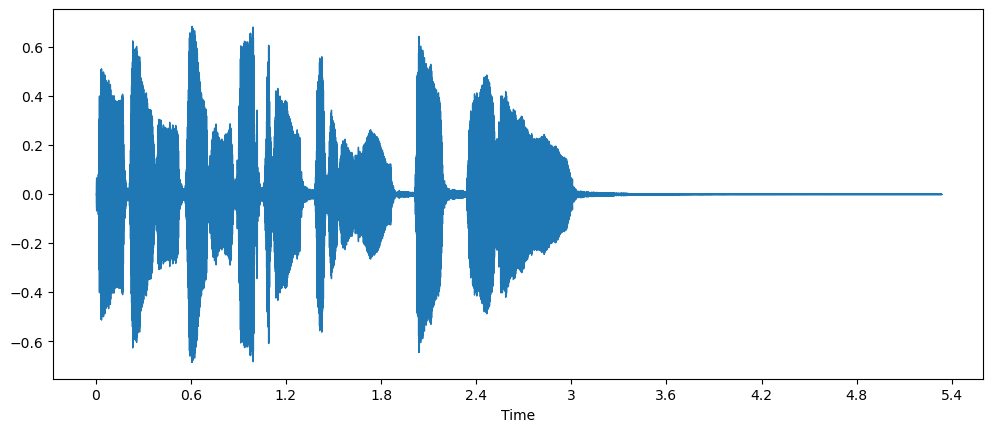

In [2]:
import matplotlib.pyplot as plt
import librosa.display

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

In [3]:
array[:5]

array([-1.4068246e-03, -4.4607770e-04, -4.1098156e-04,  9.9922603e-05,
        4.3147978e-05], dtype=float32)

In [4]:
type(array)

numpy.ndarray

In [5]:
len(array)

117601

In [6]:
import numpy as np

dft_input = array[:8192]

In [7]:
# calculate the DFT
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

In [8]:
len(window)

8192

In [9]:
print(dft)

[-2.18180002e-04+0.00000000e+00j -2.04155426e-05-1.08952556e-03j
  9.24083484e-04+1.93526629e-04j ... -8.31871101e-08+3.38487353e-06j
 -3.02099704e-06-3.69307347e-06j  3.64474469e-06+0.00000000e+00j]


In [10]:
# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

In [11]:
amplitude_db

array([-80., -80., -80., ..., -80., -80., -80.])

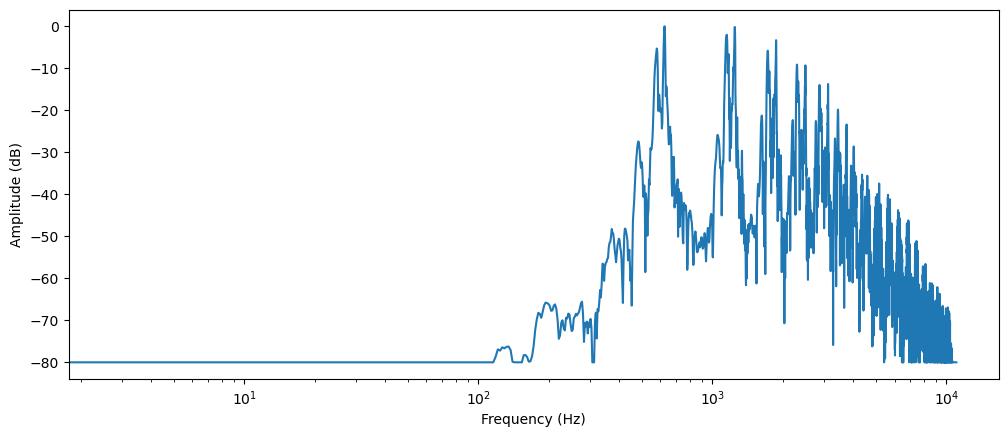

In [12]:
# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

#Visualizing the frequency domain
plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

In [13]:
frequency

array([0.00000000e+00, 2.69165039e+00, 5.38330078e+00, ...,
       1.10196167e+04, 1.10223083e+04, 1.10250000e+04])

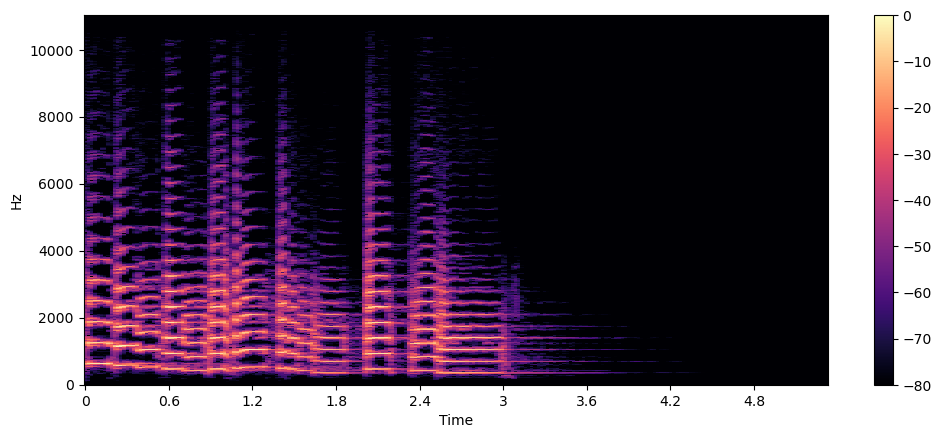

In [14]:
#Spectrogram

import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

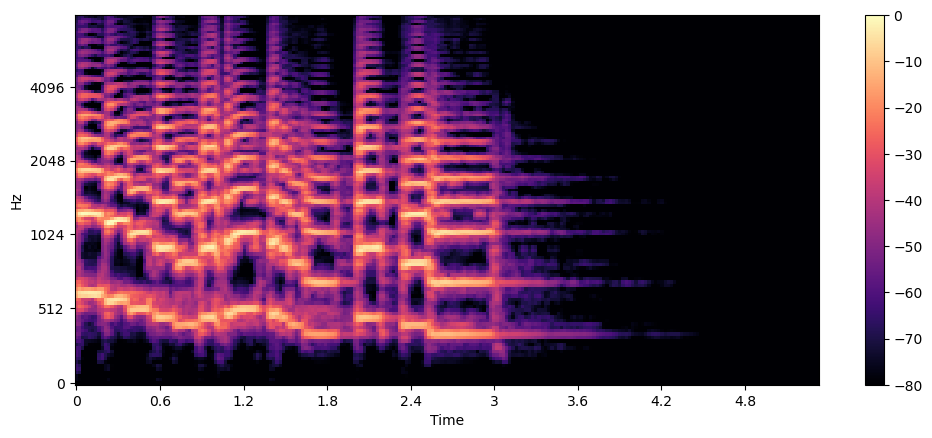

In [15]:
#Mel Spectrogram

S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()

# Load and explore audio datasets

In [25]:
!pip install datasets[audio]

     -------------------------------------- 519.6/519.6 kB 4.1 MB/s eta 0:00:00
  Using cached fsspec-2023.6.0-py3-none-any.whl (163 kB)
     -------------------------------------- 134.8/134.8 kB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 24.3/24.3 MB 6.6 MB/s eta 0:00:00
     -------------------------------------- 115.3/115.3 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2022.11.0
    Uninstalling fsspec-2022.11.0:
      Successfully uninstalled fsspec-2022.11.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.6
    Uninstalling dill-0.3.6:
      Successfully uninstalled dill-0.3.6


In [14]:
from datasets import load_dataset

In [15]:
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds

Found cached dataset minds14 (C:/Users/1508/.cache/huggingface/datasets/PolyAI___minds14/en-AU/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696)


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [16]:
example = minds[2]
example

{'path': 'C:\\Users\\1508\\.cache\\huggingface\\datasets\\downloads\\extracted\\074ad01eab91ff84fe54e382f105607066bb8d43d030d9b59b5130818a5458ae\\en-AU~PAY_BILL\\response_16.wav',
 'audio': {'path': 'C:\\Users\\1508\\.cache\\huggingface\\datasets\\downloads\\extracted\\074ad01eab91ff84fe54e382f105607066bb8d43d030d9b59b5130818a5458ae\\en-AU~PAY_BILL\\response_16.wav',
  'array': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
  'sampling_rate': 8000},
 'transcription': 'pay a bill',
 'english_transcription': 'pay a bill',
 'intent_class': 13,
 'lang_id': 2}

In [17]:
id2label = minds.features["intent_class"].int2str
id2label(example["intent_class"])

'pay_bill'

In [18]:
type(minds.features["intent_class"])

datasets.features.features.ClassLabel

In [19]:
id2label

<bound method ClassLabel.int2str of ClassLabel(names=['abroad', 'address', 'app_error', 'atm_limit', 'balance', 'business_loan', 'card_issues', 'cash_deposit', 'direct_debit', 'freeze', 'high_value_payment', 'joint_account', 'latest_transactions', 'pay_bill'], id=None)>

In [20]:
columns_to_remove = ["lang_id", "english_transcription"]
minds = minds.remove_columns(columns_to_remove)
minds

Dataset({
    features: ['path', 'audio', 'transcription', 'intent_class'],
    num_rows: 654
})

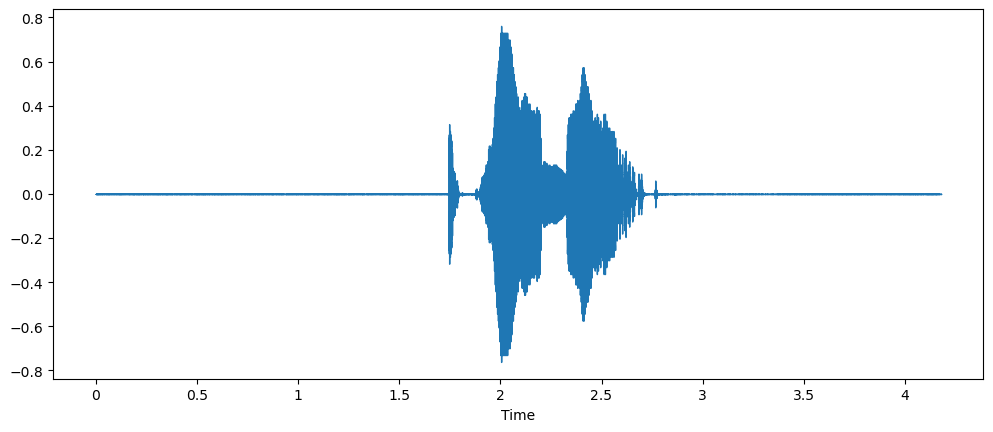

In [21]:
import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]

plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

C:\Users\1508\AppData\Local\anaconda30\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


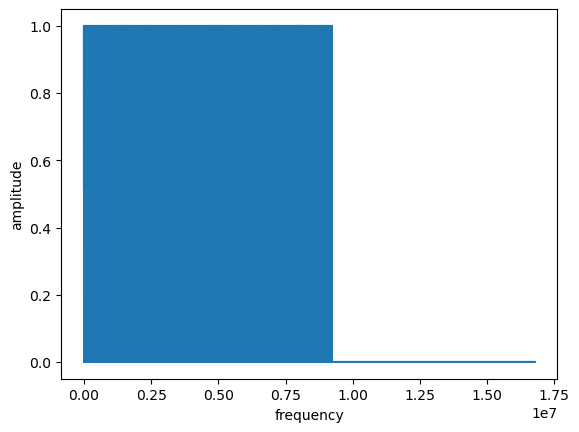

In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

# rate, aud_data = scipy.io.wavfile.read(file)
rate, aud_data = 44000, np.random.random((9218368,))

len_data = len(aud_data)

channel_1 = np.zeros([2**(int(np.ceil(np.log2(len_data)))),1])
channel_1[0:len_data] = aud_data.reshape(-1, 1)  # Reshape aud_data to match dimensions

fourier = np.fft.fft(channel_1)

plt.figure(1)
plt.plot(fourier)
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()


In [16]:
#Mel Frequency Cepstral Coefficients (MFCC)

import librosa

# Load audio file

y, sr = librosa.load(librosa.ex("trumpet"))

# Compute MFCC
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Print shape of MFCC matrix
print(mfcc.shape)


(13, 230)


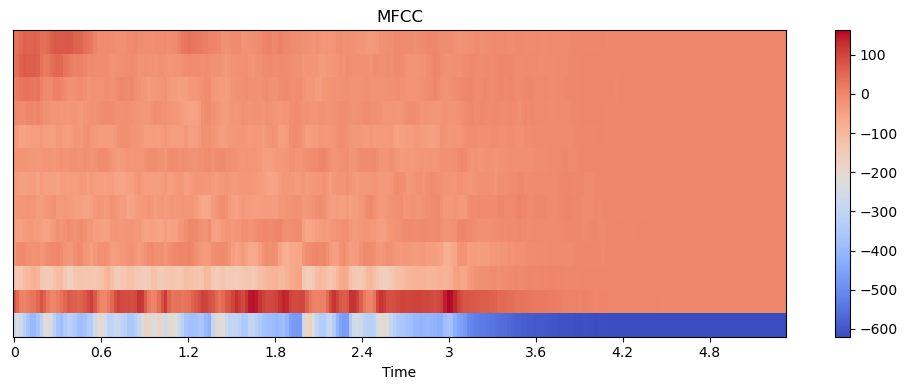

In [17]:
import librosa.display
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


# Python code example for speech recognition and transcription

In [22]:
from datasets import load_dataset
from transformers import pipeline
cls = pipeline("automatic-speech-recognition")
minds = load_dataset("PolyAI/minds14", name="en-AU", split="train")
minds


No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebo

Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})

In [23]:
example = minds[500]
cls(example["audio"]["array"])


{'text': 'WHAT ONOTHEN I VILENT'}

In [24]:
example["english_transcription"]

'yes I recognise the payment'

In [25]:
from datasets import load_dataset
from datasets import Audio
minds = load_dataset("PolyAI/minds14", name="de-DE", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))
example = minds[500]
example["transcription"]


Found cached dataset minds14 (C:/Users/1508/.cache/huggingface/datasets/PolyAI___minds14/de-DE/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696)


'ich habe bitte eine Frage ich würde gerne eine Rechnung bezahlen wie kann ich das bitte machen'

In [26]:
from transformers import pipeline
cls = pipeline("automatic-speech-recognition", model="maxidl/wav2vec2-large-xlsr-german")
cls(example["audio"]["array"])


C:\Users\1508\AppData\Local\anaconda30\lib\site-packages\transformers\configuration_utils.py:381: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Some weights of the model checkpoint at maxidl/wav2vec2-large-xlsr-german were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing

{'text': 'ruscott ich habe bitte eine frage ich würde gern eine rechnung bezahlen wie kann nich das bitte machen'}

In [7]:
!pip install torchaudio

     ---------------------------------------- 2.3/2.3 MB 7.4 MB/s eta 0:00:00
     -------------------------------------- 192.3/192.3 MB 4.7 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0+cu118
    Uninstalling torch-2.1.0+cu118:
      Successfully uninstalled torch-2.1.0+cu118


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.16.0 requires torch==2.1.0, but you have torch 2.1.1 which is incompatible.
